## Latar Belakang

DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitor. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

## Tugas dan Langkah
Pada tugas kali ini, kamu akan melakukan Data Preprocessing (Data Cleansing) bulan lalu, yakni Juni 2020.

Langkah yang akan dilakukan adalah:

<li>Mencari ID pelanggan (Nomor telepon) yang valid
<li>Mengatasi data-data yang masih kosong (Missing Values)
<li>Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
<li>Menstandardisasi Nilai dari Variable

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
pd.options.display.max_columns

20

In [3]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The Details:
<br>
<li>UpdatedAt Periode of Data taken
<li>customerID Customer ID
<li>gender Whether the customer is a male or a female (Male, Female)
<li>SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
<li>Partner Whether the customer has a partner or not (Yes, No)
<li>Dependents Whether the customer has dependents or not (Yes, No)
<li>tenure Number of months the customer has stayed with the company
<li>PhoneService Whether the customer has a phone service or not (Yes, No)
<li>MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
<li>InternetService Customer’s internet service provider (DSL, Fiber optic, No)
<li>OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
<li>OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
<li>DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
<li>TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
<li>StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
<li>StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
<li>Contract The contract term of the customer (Month-to-month, One year, Two year)
<li>PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
<li>PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<li>MonthlyCharges The amount charged to the customer monthly
<li>TotalCharges The total amount charged to the customer
<li>Churn Whether the customer churned or not (Yes or No)

In [4]:
df.shape

(7113, 22)

In [5]:
df['customerID'].nunique()

7017

## Memfilter ID Number Pelanggan Format Tertentu

Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

<li>Panjang karakter adalah 11-12.
<li>Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
<li>Diawali dengan angka 45 2 digit pertama.

In [6]:
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')

In [7]:
df = (df[df['valid_id'] == True]).drop('valid_id', axis=1)

In [8]:
df['customerID'].count()

7006

In [9]:
df.head(2)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Identify Duplicates Data

In [10]:
df.duplicated().any()

True

In [11]:
df.duplicated().sum()

7

In [12]:
df[df.duplicated()]

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7050,202006,45389829046,Female,0,No,Yes,10.0,Yes,Yes,DSL,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.55,693.30,No
7051,202006,45393846634,Male,0,No,No,72.0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.10,No
7052,202006,45769613854,Female,0,Yes,Yes,49.0,Yes,No,DSL,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20,No
7053,202006,45245391649,Female,1,No,No,54.0,Yes,Yes,DSL,...,No,Yes,Yes,No,One year,No,Mailed check,72.10,3886.05,No
7054,202006,45955898553,Female,0,No,No,71.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),106.75,7283.25,No
7055,202006,45961764656,Female,0,No,No,22.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.25,412.55,No
7056,202006,45634041360,Female,0,Yes,Yes,50.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1070.25,No


In [13]:
df.drop_duplicates(inplace=True)
df.shape

(6999, 22)

In [14]:
df.duplicated().any()

False

In [15]:
# drop customerID yang duplikat dan diambil yang terbesarnya
df = df.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
df['customerID'].nunique()

6993

In [16]:
df.shape

(6993, 22)

Validitas dari Customer ID pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah baris dari pertama data di load sampe dengan hasil akhir. Pada pertama kali load, data yang tersaji adalah 7113, setelah diperiksa duplikasi data pada tiap kolom, dan duplikasi customerID maka yang tersisa 6993 baris data

## Mengatasi Data yang Hilang

In [17]:
df.head(2)

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No


In [18]:
df.isnull().any()

UpdatedAt           False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure               True
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges       True
TotalCharges         True
Churn                True
dtype: bool

Karena untuk project ini modeller tidak menerima data dengan label kosong, maka row dengan kolom "Churn" yang kosong akan di <b>Drop</b>

In [19]:
df['Churn'].isnull().sum()

43

In [20]:
df.dropna(subset='Churn', inplace=True)

In [21]:
df.shape

(6950, 22)

Filling missing value dengan data tertentu

In [22]:
df.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn                0
dtype: int64

In [23]:
df[df['tenure'].isnull()].head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4751,202006,45878556437,Male,0,No,No,NaN,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),23.15,245.20,Yes
4739,202006,45308828568,Female,0,No,No,NaN,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,No
4498,202006,45096723224,Female,0,Yes,Yes,NaN,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.00,196.35,No
4517,202006,45201242861,Female,1,Yes,No,NaN,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.55,1131.20,Yes
4606,202006,45173453405,Female,0,Yes,Yes,NaN,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.00,300.70,No


In [24]:
df['tenure'].fillna(value=11, inplace=True)

In [25]:
monthly_charges_med = df['MonthlyCharges'].median()
tcharges_med = df['TotalCharges'].median()

In [26]:
df['MonthlyCharges'].fillna(monthly_charges_med, inplace=True)
df['TotalCharges'].fillna(tcharges_med, inplace=True)

In [27]:
df.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom <b>Churn</b>, <b>tenure</b>, <b>MonthlyCharges</b> & <b>TotalCharges</b>. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)

## Mendeteksi Outliers

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

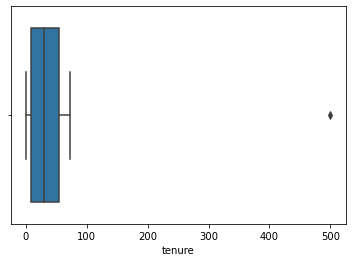

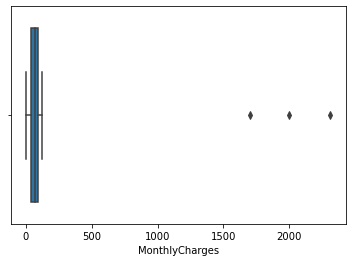

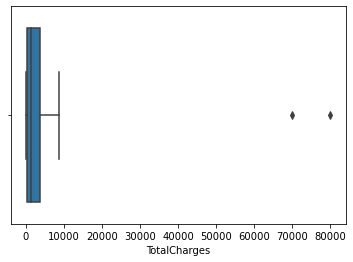

In [29]:
for col in list(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.figure()
    sns.boxplot(x=df[col])
plt.show()

In [30]:
df.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6950.0,6950.000000,6950.000000,6950.000000,6950.000000
mean,202006.0,0.162302,32.477266,65.783741,2305.083460
std,0.0,0.368754,25.188910,50.457871,2578.651143
min,202006.0,0.000000,0.000000,0.000000,19.000000
25%,202006.0,0.000000,9.000000,36.462500,406.975000
50%,202006.0,0.000000,29.000000,70.450000,1400.850000
75%,202006.0,0.000000,55.000000,89.850000,3799.837500
max,202006.0,1.000000,500.000000,2311.000000,80000.000000


In [33]:
Q1 = (df[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR = Q3-Q1

In [34]:
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

In [35]:
maximum

tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

In [37]:
minimum

tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

In [41]:
more_than = df > maximum
lower_than = df < minimum

C:\Users\elwhite\AppData\Local\Temp\ipykernel_8948\341836737.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = df > maximum
C:\Users\elwhite\AppData\Local\Temp\ipykernel_8948\341836737.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = df < minimum


In [43]:
df = df.mask(more_than, maximum, axis=1)

In [44]:
df = df.mask(lower_than, minimum, axis=1)

In [46]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.